[INFO] Descargando/accediendo a MNIST...
[0 1 2 3 4 5 6 7 8 9]
[INFO] Entrenando red...
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 88s 2ms/step - loss: 0.1762 - accuracy: 0.9468 - val_loss: 0.0728 - val_accuracy: 0.9775
Epoch 2/20
48000/48000 [==============================] - 88s 2ms/step - loss: 0.0574 - accuracy: 0.9817 - val_loss: 0.0618 - val_accuracy: 0.9804
Epoch 3/20
48000/48000 [==============================] - 88s 2ms/step - loss: 0.0306 - accuracy: 0.9898 - val_loss: 0.0532 - val_accuracy: 0.9841
Epoch 4/20
48000/48000 [==============================] - 88s 2ms/step - loss: 0.0190 - accuracy: 0.9940 - val_loss: 0.0765 - val_accuracy: 0.9783
Epoch 5/20
48000/48000 [==============================] - 88s 2ms/step - loss: 0.0142 - accuracy: 0.9959 - val_loss: 0.0714 - val_accuracy: 0.9822
Epoch 6/20
48000/48000 [==============================] - 88s 2ms/step - loss: 0.0114 - accuracy: 0.9965 - val_loss: 0.0958 - v

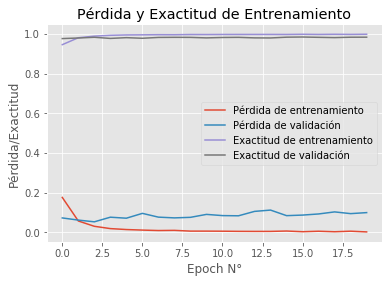

In [4]:
import sys
import os
from builtins import str
import matplotlib.pyplot as plt#para los graficos
import numpy as np#para trabajar con con las imagenes en arreglos
from keras import Sequential#para crear la red 
from keras.datasets import mnist  # En este módulo está MNIST en formato numpy
from keras.layers import Dense, Conv2D, Flatten
from keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

epocas=20 #es la cantidad de ciclos la cual se entrenara la red
altura, longitud= 100, 100 #los pixeles en los cuales se transforamra la imagen
batch_size=32#numero de imgenenes por epoca

print('[INFO] Descargando/accediendo a MNIST...')
(X_train, y_train), (X_test, y_test) = mnist.load_data()#carga los datos de mnist
X_train = X_train.astype('float32') / 255.0#divido en 255 para normalizar la data eligo este dato por que es valor maximo que puede tomar un valor en escala de grises 
X_test = X_test.astype('float32') / 255.0

X_train = np.expand_dims(X_train, axis=3)#expando las dimensiones del conjunto de entre. a 3 1,batch size como es en escala de grises solo es ejem:28x28 en vez de 28x28x28 en rgb 
X_test = np.expand_dims(X_test, axis=3)

label_binarizer = LabelBinarizer()#aca le damos la forma de arrglo
y_train = label_binarizer.fit_transform(y_train)#aca los transformamos 
y_test = label_binarizer.fit_transform(y_test)
print(label_binarizer.classes_)
# Ahora debemos convertir las etiquetas en vectores one-hot encoded.
# Esta será la transformación:
# - 0 --> [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# - 1 --> [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
# - 2 --> [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
# - 3 --> [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
# - 4 --> [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
# - 5 --> [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# - 6 --> [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
# - 7 --> [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
# - 8 --> [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
# - 9 --> [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
model = Sequential()#iniciamos la red comvolucional
model.add(Conv2D(input_shape=(28, 28, 1), filters=64, strides=(2, 2), padding='same', activation='relu', kernel_size=(3, 3)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

print('[INFO] Entrenando red...')
adam = Adam()
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.8)
H = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=epocas,
              batch_size=batch_size)

print('[INFO] Evaluando red...')
predictions = model.predict(X_test, batch_size=batch_size)
print(classification_report(y_test.argmax(axis=1),
                            predictions.argmax(axis=1),
                            target_names=[str(x) for x in label_binarizer.classes_]))
#print(x)
print('[INFO] Generando gráfico...')
plt.style.use('ggplot')
plt.figure()
epoch_values = list(range(epocas))
plt.plot(epoch_values, H.history['loss'], label='Pérdida de entrenamiento')
plt.plot(epoch_values, H.history['val_loss'], label='Pérdida de validación')
plt.plot(epoch_values, H.history['accuracy'], label='Exactitud de entrenamiento')
plt.plot(epoch_values, H.history['val_accuracy'], label='Exactitud de validación')

plt.title('Pérdida y Exactitud de Entrenamiento')
plt.xlabel('Epoch N°')
plt.ylabel('Pérdida/Exactitud')
plt.legend()
plt.show()
dir='./modelo/'
if not os.path.exists(dir):
    os.mkdir(dir)
model.save('./modelo/modelo.h5')
model.save_weights('./modelo/pesos.h5')